In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chardet
import scipy.stats as stats
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob

In [2]:
# Read in the file
file_path = 'C:/Users/Documents/Survey responses.csv'

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        print(result)
    return result['encoding']

# Detect encoding
detected_encoding = detect_encoding(file_path)

# Read the CSV file using the detected encoding
df = pd.read_csv(file_path, encoding=detected_encoding)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
# Random sample of the dataset
df.sample(10)

,Age,Gender,Social Media Platform,Years Using Social Madia,Frequency of Social Madia Usage,Daily Time on Social Media (hrs),Primary Purpose of Social Media Use,Abbreviation Usage Frequency,Most Used Abbreviations,Misunderstandings Due to Abbreviations,Adapt Abbreviation Use based on Context,Perceived Sociolinguistic Meaning of Abbreviations,Abbreviations' Impact on Communication,Opinion on Abbreviations in Communication,Additional Comments on Abbreviations
56,18-24,Male,"Facebook, Twitter, Instagram, Snapchat, TikTok",3-5 years,Daily,2-4 hours,News consumption,Occasionally,Aw,Yes,Yes,Yes,Yes,Hinder,Our overfamiliarity with abbreviations in text...
61,18-24,Female,Facebook,3-5 years,Daily,30 minutes to 1 hour,Others,Rarely,Lol,No,Yes,Yes,Yes,Enhance,No comment
54,18-24,Female,"Instagram, Snapchat, TikTok",6-10 years,Daily,2-4 hours,"Socializing, News consumption, Entertainment, ...",Occasionally,Smh,Yes,Yes,Yes,No,Enhance,No comment
85,45-54,Female,Facebook,More than 10 years,Daily,2-4 hours,Entertainment,Very frequently,Lol,Yes,No,Maybe,Yes,Hinder,It's aids use the use of bad English
49,Under 18,Female,"Instagram, Snapchat, TikTok",3-5 years,Daily,More than 4 hours,Entertainment,Rarely,Com,No,No,Yes,Yes,No impact,No comment
19,18-24,Male,"Facebook, Twitter, Instagram, Snapchat, TikTok",3-5 years,Daily,More than 4 hours,"Socializing, News consumption, Entertainment, ...",Rarely,Lol,Yes,Yes,Maybe,Yes,Hinder,No comment
64,55+,Male,"Facebook, Twitter",More than 10 years,Daily,2-4 hours,"Socializing, News consumption, Entertainment, ...",Rarely,Ok,Yes,Yes,No,Yes,Hinder,Use of abbreviations signifies laziness
18,18-24,Female,Twitter,6-10 years,Daily,30 minutes to 1 hour,"Entertainment, Others",Occasionally,Lol,No,Yes,Yes,Yes,Enhance,No comment
13,18-24,Female,"Facebook, Twitter, Instagram, Snapchat, TikTok",6-10 years,Daily,More than 4 hours,"Socializing, News consumption, Entertainment",Occasionally,Tbh,No,Yes,Maybe,Yes,Enhance,No comment
66,55+,Male,"Facebook, Instagram",6-10 years,Weekly,30 minutes to 1 hour,"Socializing, Entertainment, Others",Rarely,"Hbd, Llp",No,Yes,No,Yes,Hinder,No comment


In [4]:
# Value counts for categorical columns
print('Value Counts for Age:')
print((df['Age'].value_counts()/df.shape[0])*100)

Value Counts for Age:
18-24       41.904762
55+         17.142857
35-44       16.190476
45-54       15.238095
25-34        8.571429
Under 18     0.952381
Name: Age, dtype: float64


In [5]:
# Split the 'Abbreviations' column by commas and create new columns
df_split = df['Most Used Abbreviations'].str.split(',', expand=True)

# Append numbers to the new column names
df_split.columns = [f'Most Used Abbreviations_{i+1}' for i in range(df_split.shape[1])]

# Concatenate the original DataFrame with the split columns
df = pd.concat([df, df_split], axis=1)

# Display the resulting DataFrame
df.head()

,Age,Gender,Social Media Platform,Years Using Social Madia,Frequency of Social Madia Usage,Daily Time on Social Media (hrs),Primary Purpose of Social Media Use,Abbreviation Usage Frequency,Most Used Abbreviations,Misunderstandings Due to Abbreviations,...,Additional Comments on Abbreviations,Most Used Abbreviations_1,Most Used Abbreviations_2,Most Used Abbreviations_3,Most Used Abbreviations_4,Most Used Abbreviations_5,Most Used Abbreviations_6,Most Used Abbreviations_7,Most Used Abbreviations_8,Most Used Abbreviations_9
0,45-54,Male,"Twitter, Instagram, Snapchat, TikTok",More than 10 years,Daily,2-4 hours,"News consumption, Entertainment, Networking",Rarely,None,Yes,...,It does not help to develop an individual's co...,None,None,None,None,None,None,None,None,None
1,18-24,Male,Instagram,3-5 years,Daily,More than 4 hours,Entertainment,Rarely,Lol,Yes,...,No comment,Lol,None,None,None,None,None,None,None,None
2,18-24,Female,Facebook,1-3 years,Daily,More than 4 hours,Socializing,Very frequently,Lol,No,...,Its makes typing faster and easier,Lol,None,None,None,None,None,None,None,None
3,18-24,Female,"Facebook, Instagram",6-10 years,Daily,30 minutes to 1 hour,News consumption,Rarely,Lol,Yes,...,Reduce abbreviation online,Lol,None,None,None,None,None,None,None,None
4,18-24,Female,"Facebook, Instagram, TikTok",1-3 years,Weekly,30 minutes to 1 hour,"Socializing, Entertainment, Networking",Very frequently,Ok,No,...,NaN,Ok,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,18-24,Female,"Facebook, TikTok",6-10 years,Daily,More than 4 hours,"Socializing, News consumption, Entertainment, ...",Very frequently,"Lol, Brb, Ttyl, Ave, Hwfa, Sumtin, Fr, Wyd, Wby",Yes,...,It’s faster,Lol,Brb,Ttyl,Ave,Hwfa,Sumtin,Fr,Wyd,Wby
101,55+,Female,"Facebook, Instagram",More than 10 years,Daily,30 minutes to 1 hour,"Socializing, Entertainment",Rarely,Lol,Yes,...,NaN,Lol,None,None,None,None,None,None,None,None
102,25-34,Female,"Facebook, Instagram, TikTok",6-10 years,Daily,2-4 hours,"Entertainment, Others",Rarely,Lol,Yes,...,NaN,Lol,None,None,None,None,None,None,None,None
103,35-44,Male,"Facebook, Twitter",6-10 years,Daily,2-4 hours,News consumption,Occasionally,"Lol, Brb",Yes,...,No comment,Lol,Brb,None,None,None,None,None,None,None


The age distribution of the data collected shows that 45% of the respondents were between the ages of 18 to 34 while 18% were older than 55

In [14]:
#Split the 'Platform' column by commas and create new columns
df_split_plat = df['Social Media Platform'].str.split(',', expand=True)

# Append numbers to the new column names
df_split_plat.columns = [f'Social Media Platform_{i+1}' for i in range(df_split_plat.shape[1])]

# Concatenate the original DataFrame with the split columns

# Display the resulting DataFrame
df_split_plat

,Social Media Platform_1,Social Media Platform_2,Social Media Platform_3,Social Media Platform_4,Social Media Platform_5
0,Twitter,Instagram,Snapchat,TikTok,None
1,Instagram,None,None,None,None
2,Facebook,None,None,None,None
3,Facebook,Instagram,None,None,None
4,Facebook,Instagram,TikTok,None,None
...,...,...,...,...,...
100,Facebook,TikTok,None,None,None
101,Facebook,Instagram,None,None,None
102,Facebook,Instagram,TikTok,None,None
103,Facebook,Twitter,None,None,None


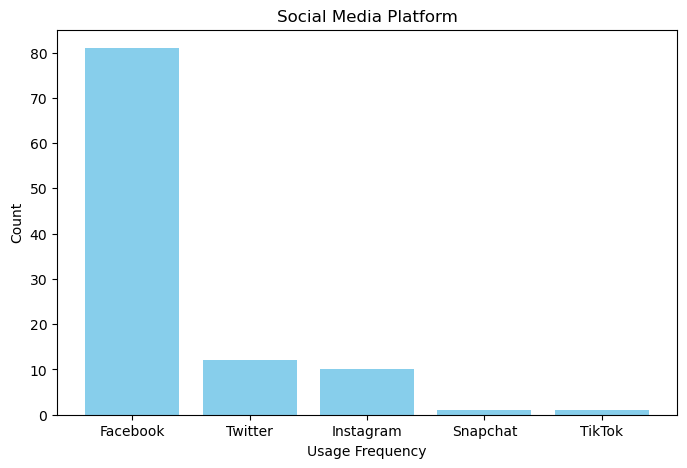

In [29]:
# Analyze social media
usage_frequency_counts = df_split_plat['Social Media Platform_1'].value_counts()

# Plot abbreviation usage frequency
plt.figure(figsize=(8, 5))
plt.bar(usage_frequency_counts.index, usage_frequency_counts.values, color='skyblue')
plt.title('Social Media Platform')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

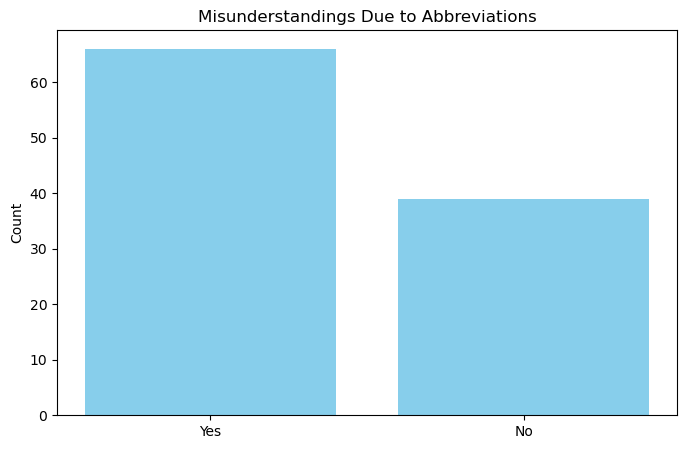

In [42]:
# Analyze social media
usage_frequency_counts = df['Misunderstandings Due to Abbreviations'].value_counts()

# Plot abbreviation usage frequency
plt.figure(figsize=(8, 5))
plt.bar(usage_frequency_counts.index, usage_frequency_counts.values, color='skyblue')
plt.title('Misunderstandings Due to Abbreviations')
#plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

In [40]:
usage_frequency_counts = (df['Misunderstandings Due to Abbreviations'].value_counts()/df.shape[0])*100
usage_frequency_counts

Yes    62.857143
No     37.142857
Name: Misunderstandings Due to Abbreviations, dtype: float64

In [16]:
df_split_plat['Social Media Platform_1'].value_counts()

Facebook     81
Twitter      12
Instagram    10
Snapchat      1
TikTok        1
Name: Social Media Platform_1, dtype: int64

In [6]:
print('Value Counts for Abbreviation Usage Frequency:')
print(df['Abbreviation Usage Frequency'].value_counts())

Value Counts for Abbreviation Usage Frequency:
Rarely             44
Occasionally       33
Very frequently    21
Never               7
Name: Abbreviation Usage Frequency, dtype: int64


In [9]:
print('Value Counts for Most Used Abbreviations:')
print(df['Most Used Abbreviations_1'].value_counts()[:10])

Value Counts for Most Used Abbreviations:
Lol     41
None    14
Hbd      4
Lmao     4
Ok       3
Uwc      3
Smh      3
Ur       2
Asap     2
Llnp     2
Name: Most Used Abbreviations_1, dtype: int64


## Analysis

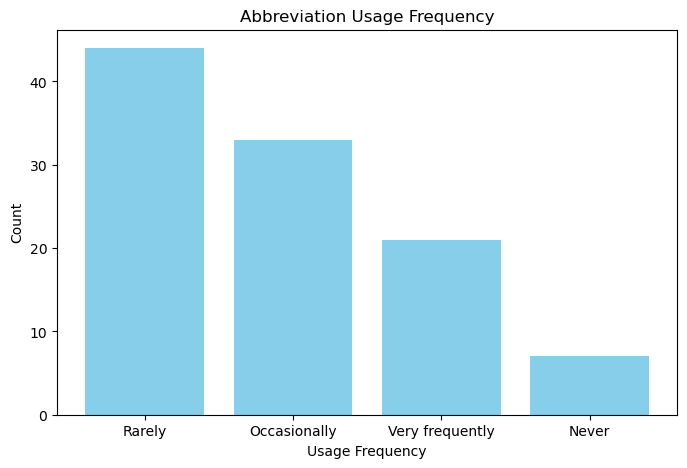

In [33]:
# Analyze abbreviation usage frequency
usage_frequency_counts = df['Abbreviation Usage Frequency'].value_counts()

# Plot abbreviation usage frequency
plt.figure(figsize=(8, 5))
plt.bar(usage_frequency_counts.index, usage_frequency_counts.values, color='skyblue')
plt.title('Abbreviation Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

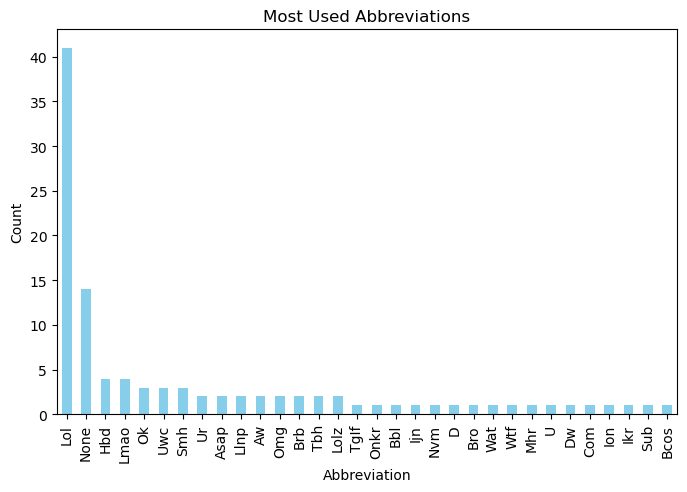

In [34]:
# Analyze most used abbreviations
most_used_abbreviations_counts = df['Most Used Abbreviations_1'].value_counts()

# Plot most used abbreviations
plt.figure(figsize=(8, 5))
most_used_abbreviations_counts.plot(kind='bar', color='skyblue')
plt.title('Most Used Abbreviations')
plt.xlabel('Abbreviation')
plt.ylabel('Count')
plt.show()

#print('Abbreviation Usage Frequency:')
#print(usage_frequency_counts)
#print('\nMost Used Abbreviations:')
#print(most_used_abbreviations_counts)

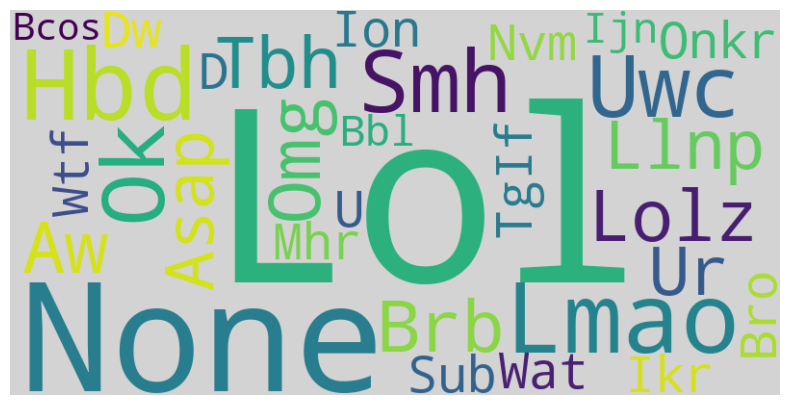

In [35]:
# Combine all words into a single string
df_copy = df.copy()

all_words = ' '.join(df['Most Used Abbreviations_1'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='LightGray').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Research Question 1

How have abbreviations evolved linguistically over time?

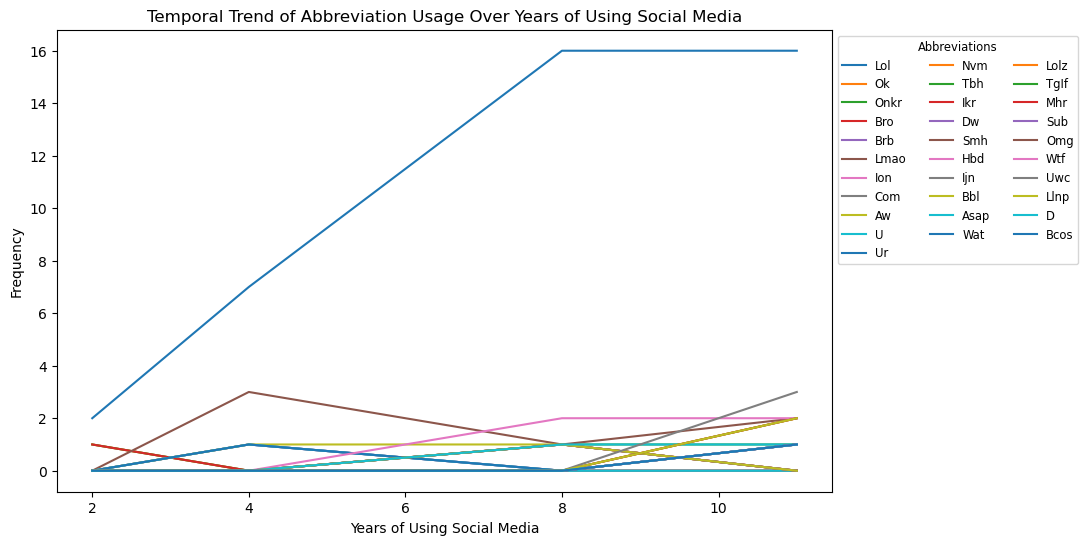

In [47]:
# Function to categorize the years of using social media into numeric values
def categorize_years(years_str):
    if 'More than' in years_str:
        return 11  # Considering 'More than 10 years' as 11 years
    elif '-' in years_str:
        start, end = map(int, re.findall(r'\d+', years_str))  # Extract numeric values
        return (start + end) / 2  # Taking the average for ranges
    elif 'year' in years_str:
        return int(re.findall(r'\d+', years_str)[0])  # Extract numeric value for single years
    else:
        raise ValueError(f"Invalid years format: {years_str}")

# Apply categorization to create a new numeric column for years of using social media
df_abb =  df[df['Most Used Abbreviations_1'] != 'None']
df_abb['Years Numeric'] = df_abb['Years Using Social Madia'].apply(categorize_years)

# Group by years of using social media and count the occurrences of each abbreviation
abbreviation_counts = df_abb.groupby('Years Numeric')['Most Used Abbreviations_1'].apply(lambda x: Counter(x)).unstack().fillna(0)

# Plot the temporal trend
plt.figure(figsize=(10, 6))
for abbreviation in abbreviation_counts.columns:
    plt.plot(abbreviation_counts.index, abbreviation_counts[abbreviation], label=abbreviation)

plt.xlabel('Years of Using Social Media')
plt.ylabel('Frequency')
plt.title('Temporal Trend of Abbreviation Usage Over Years of Using Social Media')

# Customize legend
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3, fontsize='small')
legend.set_title('Abbreviations', prop={'size': 'small'})

# Display the plot
plt.show()


In [56]:
abbreviation_counts.T

Years Numeric,2.0,4.0,8.0,11.0
Lol,2.0,7.0,16.0,16.0
Ok,1.0,0.0,0.0,2.0
Onkr,1.0,0.0,0.0,0.0
Bro,1.0,0.0,0.0,0.0
Brb,0.0,1.0,0.0,1.0
Lmao,0.0,3.0,1.0,0.0
Ion,0.0,1.0,0.0,0.0
Com,0.0,1.0,0.0,0.0
Aw,0.0,1.0,1.0,0.0
U,0.0,1.0,0.0,0.0


The survey response collectd showed that there are very little varioations in the abbreviations usage overtime with "LOL" being a constant abbreviation in use by respondents to the survey. There are some abbreviations that have come into use  recently but are not reported to be used in common interactions by respondents. This would suggest that although abbreviations are evolving people that have used social media more tend to not use new abbreviations as often as newer users.

In [51]:
abbreviation_counts

,Lol,Ok,Onkr,Bro,Brb,Lmao,Ion,Com,Aw,U,...,Lolz,TgIf,Mhr,Sub,Omg,Wtf,Uwc,Llnp,D,Bcos
Years Numeric,,,,,,,,,,,,,,,,,,,,,
2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,7.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,16.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0


In [ ]:
df_abb =  df[df['Most Used Abbreviations_1'] != 'None']

In [50]:
df_abb

,Age,Gender,Social Media Platform,Years Using Social Madia,Frequency of Social Madia Usage,Daily Time on Social Media (hrs),Primary Purpose of Social Media Use,Abbreviation Usage Frequency,Most Used Abbreviations,Misunderstandings Due to Abbreviations,...,Most Used Abbreviations_1,Most Used Abbreviations_2,Most Used Abbreviations_3,Most Used Abbreviations_4,Most Used Abbreviations_5,Most Used Abbreviations_6,Most Used Abbreviations_7,Most Used Abbreviations_8,Most Used Abbreviations_9,Years Numeric
1,18-24,Male,Instagram,3-5 years,Daily,More than 4 hours,Entertainment,Rarely,Lol,Yes,...,Lol,None,None,None,None,None,None,None,None,4.0
2,18-24,Female,Facebook,1-3 years,Daily,More than 4 hours,Socializing,Very frequently,Lol,No,...,Lol,None,None,None,None,None,None,None,None,2.0
3,18-24,Female,"Facebook, Instagram",6-10 years,Daily,30 minutes to 1 hour,News consumption,Rarely,Lol,Yes,...,Lol,None,None,None,None,None,None,None,None,8.0
4,18-24,Female,"Facebook, Instagram, TikTok",1-3 years,Weekly,30 minutes to 1 hour,"Socializing, Entertainment, Networking",Very frequently,Ok,No,...,Ok,None,None,None,None,None,None,None,None,2.0
5,18-24,Female,"Facebook, Twitter, Instagram, Snapchat, TikTok",6-10 years,Daily,1-2 hours,"Socializing, Entertainment, Networking",Rarely,Nvm,Yes,...,Nvm,None,None,None,None,None,None,None,None,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,18-24,Female,"Facebook, TikTok",6-10 years,Daily,More than 4 hours,"Socializing, News consumption, Entertainment, ...",Very frequently,"Lol, Brb, Ttyl, Ave, Hwfa, Sumtin, Fr, Wyd, Wby",Yes,...,Lol,Brb,Ttyl,Ave,Hwfa,Sumtin,Fr,Wyd,Wby,8.0
101,55+,Female,"Facebook, Instagram",More than 10 years,Daily,30 minutes to 1 hour,"Socializing, Entertainment",Rarely,Lol,Yes,...,Lol,None,None,None,None,None,None,None,None,11.0
102,25-34,Female,"Facebook, Instagram, TikTok",6-10 years,Daily,2-4 hours,"Entertainment, Others",Rarely,Lol,Yes,...,Lol,None,None,None,None,None,None,None,None,8.0
103,35-44,Male,"Facebook, Twitter",6-10 years,Daily,2-4 hours,News consumption,Occasionally,"Lol, Brb",Yes,...,Lol,Brb,None,None,None,None,None,None,None,8.0


In [52]:
# Analyze abbreviation usage frequency by age
age_usage_frequency = df.groupby('Age')['Abbreviation Usage Frequency'].value_counts().unstack()


print('Abbreviation Usage Frequency by Age')
age_usage_frequency

Abbreviation Usage Frequency by Age


Abbreviation Usage Frequency,Never,Occasionally,Rarely,Very frequently
Age,,,,
18-24,4.0,16.0,12.0,12.0
25-34,NaN,1.0,7.0,1.0
35-44,2.0,7.0,4.0,4.0
45-54,1.0,5.0,9.0,1.0
55+,NaN,4.0,11.0,3.0
Under 18,NaN,NaN,1.0,NaN


In [53]:
# Analyze abbreviation usage frequency by years of using social media
years_usage_frequency = df.groupby('Years Using Social Madia')['Abbreviation Usage Frequency'].value_counts().unstack()

print('\nAbbreviation Usage Frequency by Years of Using Social Media')
years_usage_frequency


Abbreviation Usage Frequency by Years of Using Social Media


Abbreviation Usage Frequency,Never,Occasionally,Rarely,Very frequently
Years Using Social Madia,,,,
1-3 years,1,1,2,2
3-5 years,1,7,7,4
6-10 years,3,9,12,7
More than 10 years,2,16,23,8


In [54]:
# Analyze abbreviation usage frequency by years of using social media
age_wtih_years_usage_frequency = df.groupby('Age')['Years Using Social Madia'].value_counts().unstack()

print('\nAge by Years of Using Social Media')
age_wtih_years_usage_frequency


Age by Years of Using Social Media


Years Using Social Madia,1-3 years,3-5 years,6-10 years,More than 10 years
Age,,,,
18-24,5.0,14.0,18.0,7.0
25-34,NaN,1.0,4.0,4.0
35-44,NaN,1.0,3.0,13.0
45-54,1.0,NaN,3.0,12.0
55+,NaN,2.0,3.0,13.0
Under 18,NaN,1.0,NaN,NaN


In [55]:
age_usage_frequency.to_csv('C:/Users/DamilolaAyodele/Documents/age_usage_frequency.csv', index=False)
years_usage_frequency.to_csv('C:/Users/DamilolaAyodele/Documents/years_usage_frequency.csv', index=False)
age_wtih_years_usage_frequency.to_csv('C:/Users/DamilolaAyodele/Documents/age_wtih_years_usage_frequency.csv', index=False)

### Research Question 2

What linguistic creativity is exhibited by social media users in the formation and interpretation of abbreviations?

In [ ]:
# Function to tokenize and count the abbreviations
def count_abbreviations(text):
    abbreviations = text.split(', ')
    return len(abbreviations), abbreviations

# Apply the function to each row to get the count and list of abbreviations
df_abb['Abbreviation Count'], df_abb['Abbreviation List'] = zip(*df_abb['Most Used Abbreviations_1'].apply(count_abbreviations))

# 1. Frequency of Abbreviations
abbreviation_frequency = df_abb['Abbreviation List'].apply(lambda x: pd.Series(x)).stack().value_counts()

# 2. Variety of Abbreviations
unique_abbreviations = abbreviation_frequency.index

# 4. Innovative Abbreviations - Assuming we consider abbreviations used by only one respondent as innovative
innovative_abbreviations = abbreviation_frequency[abbreviation_frequency == 1].index

# 5. Consistency in Usage
consistently_used_abbreviations = abbreviation_frequency[abbreviation_frequency == df_abb.shape[0]].index

# 6. Meanings and Interpretations - This would require manual analysis of the abbreviations and their meanings

# 7. Compare Across Demographics
# Assuming 'Age', 'Gender', and 'Years Using Social Media' are demographic columns
demographics_comparison = df_abb.groupby(['Age', 'Gender', 'Years Using Social Madia'])['Abbreviation List'].apply(lambda x: len(set(x.sum())))

# Display the results
print("1. Frequency of Abbreviations:")
print(abbreviation_frequency)

print("\n2. Variety of Abbreviations:")
print(unique_abbreviations)

print("\n4. Innovative Abbreviations:")
print(innovative_abbreviations)

print("\n5. Consistency in Usage:")
print(consistently_used_abbreviations)

print("\n7. Compare Across Demographics:")
demographics_comparison



The analysis of the survey data shows that pople have become more creative and expansive in their use of social media over the years as new abbreviations have been obseved based on the usage year of a respondent. However it is to be noted that more than 40% of survey respondents reported to rarely use abbreviations in their interactions on Social media. This indicates that although the abbreviations have evolved overtime, it's use on social media platforms has reduced and this is supported by the response to the survey which shows that probably due to misunderstandings arising from abbreviations in daily use. This can be seen from 63% of the respondents having been misunderstood or misundertood a usage of abbrevations in the past

In [45]:
# Filter rows where there were misunderstandings due to abbreviations
misunderstanding_data = df[df['Misunderstandings Due to Abbreviations'] == 'Yes']

# Count the occurrences of each demographic combination
demographics_counts = misunderstanding_data.groupby(['Age', 'Gender', 'Social Media Platform', 'Years Using Social Madia']).size().reset_index(name='Count')

# Print the demographics and their corresponding counts for misunderstandings
print("Demographics with Misunderstandings Due to Abbreviations:")
print(demographics_counts)

Demographics with Misunderstandings Due to Abbreviations:
      Age  Gender                           Social Media Platform  \
0   18-24  Female                             Facebook, Instagram   
1   18-24  Female                   Facebook, Instagram, Snapchat   
2   18-24  Female           Facebook, Instagram, Snapchat, TikTok   
3   18-24  Female                                Facebook, TikTok   
4   18-24  Female  Facebook, Twitter, Instagram, Snapchat, TikTok   
5   18-24  Female  Facebook, Twitter, Instagram, Snapchat, TikTok   
6   18-24  Female                                       Instagram   
7   18-24  Female                             Instagram, Snapchat   
8   18-24  Female                             Instagram, Snapchat   
9   18-24  Female                     Instagram, Snapchat, TikTok   
10  18-24  Female                                        Snapchat   
11  18-24    Male                                        Facebook   
12  18-24    Male          Facebook, Twitter,

### Research  Question 3

How do variations in abbreviation usage manifest across different user demographics?

In [48]:
# Function to analyze abbreviations for each demographic group
def analyze_abbreviations_demographics(grouped_df):
    demographics_analysis = {}

    for group_name, group_data in grouped_df:
        # Calculate abbreviation frequency for this demographic group
        abbreviation_frequency = group_data['Most Used Abbreviations_1'].str.split(', ').explode().value_counts()

        # Calculate variety of abbreviations
        unique_abbreviations = abbreviation_frequency.index

        # Store the analysis results for this demographic group
        demographics_analysis[group_name] = {
            'Abbreviation Frequency': abbreviation_frequency,
            'Unique Abbreviations': unique_abbreviations
        }

    return demographics_analysis

# Group by demographics and analyze abbreviations
grouped_demographics = df_abb.groupby(['Age', 'Gender', 'Years Using Social Madia'])
demographics_analysis_results = analyze_abbreviations_demographics(grouped_demographics)

# Display the analysis results
for group_name, analysis in demographics_analysis_results.items():
    print(f"\nDemographic Group: {group_name}")
    print("Abbreviation Frequency:")
    print(analysis['Abbreviation Frequency'])
    print("\nUnique Abbreviations:")
    print(analysis['Unique Abbreviations'])



Demographic Group: ('18-24', 'Female', '1-3 years')
Abbreviation Frequency:
Lol    2
Ok     1
Name: Most Used Abbreviations_1, dtype: int64

Unique Abbreviations:
Index(['Lol', 'Ok'], dtype='object')

Demographic Group: ('18-24', 'Female', '3-5 years')
Abbreviation Frequency:
Lol    2
Brb    1
Ion    1
U      1
Name: Most Used Abbreviations_1, dtype: int64

Unique Abbreviations:
Index(['Lol', 'Brb', 'Ion', 'U'], dtype='object')

Demographic Group: ('18-24', 'Female', '6-10 years')
Abbreviation Frequency:
Lol    5
Nvm    1
Tbh    1
Dw     1
Smh    1
Name: Most Used Abbreviations_1, dtype: int64

Unique Abbreviations:
Index(['Lol', 'Nvm', 'Tbh', 'Dw', 'Smh'], dtype='object')

Demographic Group: ('18-24', 'Female', 'More than 10 years')
Abbreviation Frequency:
Lolz    1
Smh     1
Uwc     1
Name: Most Used Abbreviations_1, dtype: int64

Unique Abbreviations:
Index(['Lolz', 'Smh', 'Uwc'], dtype='object')

Demographic Group: ('18-24', 'Male', '1-3 years')
Abbreviation Frequency:
Onkr    1
N

The data shows that there is a wide variety of the use of abbreviations increases with age among both males and females in the age range of 18-24 as their years of using social media increase. However, there's a significant drop in usage after a decade of using social media. Individuals aged 25-34, regardless of gender, tend to use fewer abbreviations, primarily sticking to "Lol" without embracing newer abbreviations that have emerged in recent years. On the other hand, those within the 35-44 age range show a significant increase in abbreviation usage as their social media usage increases, with abbreviations being used more frequently after a decade of usage. Abbreviations like LLNP and ASAP are more commonly used by males in the 45-54 age group.

In [30]:
# Analyze the sentiment of each response
for index, row in df.iterrows():
    response = row['Additional Comments on Abbreviations']
    
    # Check for "No comment" and assign neutral sentiment
    if isinstance(response, str) and response.lower() == 'no comment':
        polarity = 0.0
        sentiment_label = 'Neutral'
    else:
        # Create a TextBlob object
        blob = TextBlob(str(response))
        
        # Get the polarity of the response
        polarity = blob.sentiment.polarity
        
        # Determine the sentiment label based on polarity
        if polarity > 0:
            sentiment_label = 'Positive'
        elif polarity < 0:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
    
    # Print the response, its polarity, and the corresponding sentiment label
    print(f"Response: {response}")
    print(f"Polarity: {polarity}")
    print(f"Sentiment Label: {sentiment_label}")
    print()

Response: It does not help to develop an individual's communication skills
Polarity: 0.0
Sentiment Label: Neutral

Response: No comment 
Polarity: 0.0
Sentiment Label: Neutral

Response: Its makes typing faster and easier
Polarity: 0.0
Sentiment Label: Neutral

Response: Reduce abbreviation online 
Polarity: 0.0
Sentiment Label: Neutral

Response: nan
Polarity: 0.0
Sentiment Label: Neutral

Response: Personally it's only laziness that causes the use of abbreviations which should be stopped at every possible way
Polarity: 0.0
Sentiment Label: Neutral

Response: Non
Polarity: 0.0
Sentiment Label: Neutral

Response: It's just a normal thing this days, but people tend to forget how to use normal words because abbreviation have taken over.
Polarity: 0.15
Sentiment Label: Positive

Response: No
Polarity: 0.0
Sentiment Label: Neutral

Response: None
Polarity: 0.0
Sentiment Label: Neutral

Response: No
Polarity: 0.0
Sentiment Label: Neutral

Response: Nothing 
Polarity: 0.0
Sentiment Label: Ne

In [32]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each response
for index, row in df.iterrows():
    response = row['Additional Comments on Abbreviations']
    
    # Check for "No comment" and assign neutral sentiment
    if isinstance(response, str) and response.lower() == 'no comment':
        polarity = 0.0
        sentiment_label = 'Neutral'
    else:
        # Check if response is a string, otherwise convert to string
        response = str(response)
        
        # Get the sentiment score of the response
        score = sia.polarity_scores(response)
        
        # Determine the sentiment label based on the compound score
        if score['compound'] >= 0.2:
            sentiment_label = 'Positive'
        elif score['compound'] <= -0.2:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
    
    # Print the response, its sentiment score, and the corresponding sentiment label
    print(f"Response: {response}")
    print(f"Sentiment Score: {score}")
    print(f"Sentiment Label: {sentiment_label}")
    print()


Response: It does not help to develop an individual's communication skills
Sentiment Score: {'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.3089}
Sentiment Label: Negative

Response: No comment 
Sentiment Score: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
Sentiment Label: Negative

Response: Its makes typing faster and easier
Sentiment Score: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}
Sentiment Label: Positive

Response: Reduce abbreviation online 
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral

Response: nan
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral

Response: Personally it's only laziness that causes the use of abbreviations which should be stopped at every possible way
Sentiment Score: {'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.2263}
Sentiment Label: Negative

Response: Non
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,